#### AI
    - 머신러닝, 컴퓨터 비전, 자연어 처리, 로봇 공학 등 그와 관련된 모든 주제를 포괄하는 개념
    
#### Machine Learning
    - 더 많은 데이터 축적을 통해 성능을 개선할 수 있도록 하는 다양한 알고리즘과 방법론
    
#### Deep Learning
    - 신경망(Neural Network)를 부르는 다른 이름
    - 여러 개의 히든 레이어를 통해 깊게 학습한다고 해서 붙여진 이름


___
#### Machine Learning과 Data Mining
    - 머신러닝은 훈련 데이터를 통해 학습된 알려진 속성을 기반으로 한 예측에 중점
    - 데이터 마이닝은 데이터의 미처 몰랐던 속성을 발견하는 것에 집중 (이는 데이터베이스의 지식 발견 부분의 분석 절차에 해당한다.)
    - 이들은 방법적으로 중복되는 부분이 있다. 데이터 마이닝에서는 머신러닝은 필수가 아니지만, 머신러닝에서는 데이터마이닝이 필수라는 부분이 다르다.

---
## 머신러닝의 종류

#### 1. 지도학습(교사학습)
    - 회귀(Regression) - 연속형 데이터
        + 선형 회귀
    
    - 분류(Classification) - 이산형 데이터 / 모든 분류 알고리즘은 회귀 분석에도 사용 가능!
        + kNN(k-Nearest Neighbors)
        + 로지스틱 선형 회귀
        + Decision Tree, Random Forest
        + SVM(Support Vector Machine)
        + Naive Bayes(조건부 확률)
        + Neural Network

#### 2. 비지도학습(비교사학습)
    - 군집화(Clustering)
        + k-means
        + DBSCAN
        
    - 차원 축소
        + PCA
        
        
    
#### 3. 강화학습 (Reinforcement Learning)
    - 완전한 답을 제공하지 않는다.
    - 보상 시스템
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

In [2]:
# mglearn : 머신러닝 학습을 위한 패키지
#!pip install mglearn
import mglearn

### 샘플 소개

In [4]:
# 이진 분류 데이터셋

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

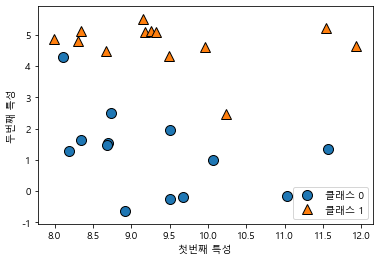

In [3]:
# X : input (입력/훈련 데이터), y : input에 대한 답 (레이블 데이터)
X, y = mglearn.datasets.make_forge()
X # 2차원 배열
y # 1차원 배열

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4) # 범례 표시
plt.xlabel("첫번째 특성") # x축 레이블
plt.ylabel("두번째 특성") # y축 레이블

(-3.0, 3.0)

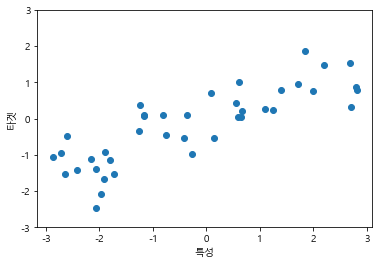

In [4]:
# 회귀 분석용 샘플

X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o') # 산포도 그리기
plt.xlabel("특성")
plt.ylabel("타겟")
plt.ylim(-3, 3) # y축 범위 지정

In [5]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
cancer.data
cancer.target
#print(cancer.DESCR) # data에 대한 설명
type(cancer) # Bunch 객체
cancer.data.shape # 569행 30열

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [6]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape

(506, 13)

----
### 과대적합
    - 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것
    - 해결방법 (핸즈온 p59)
        1) 파라미터 수가 적은 모델을 선택하거나, 훈련 데이터에 있는 특성 수를 줄이거나, 모델에 제약(parameter)을 가하여 단순화 시킴
        2) 훈련 데이터를 더 많이 모음
        3) 훈련 데이터의 노이즈를 줄임 (오류 데이터 수정, 이상치 제거 등)
    
### 과소적합
    - 너무 간단한 모델이 선택되는 것
    - 해결방법 (핸즈온 p61)
        1) 모델 파라미터가 더 많은 강력한 모델을 선택
        2) 학습 알고리즘에 더 좋은 특성을 제공 (Feature Engineering : 정규화/표준화, dummy data 등)
        3) 모델의 제약을 줄임 (규제 hyperparameter를 감소시킴)
    
### 일반화
    - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것
    

____
## KNN (K-Nearest Neighbors)

#### 1) 특징
    - 이해하기 쉽고 직관적인 모델
    - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
    - 훈련 데이터 셋이 너무 크면 예측이 느려진다.
    
#### 2) 파라미터(hyperparameter)
    - 이웃의 개수(K)
    - 데이터 사이의 거리를 재는 방법 : L1 norm, L2 norm

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


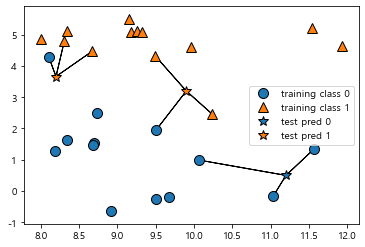

In [64]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

---
#### L1 norm, L2 norm

- norm
    - Norm은 벡터의 길이 혹은 크기를 측정하는 방법(함수)
    - Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리 혹은 Magnitude
    - p: Lorm의 차수 / p가 1이면 L1 Norm, p가 2이면 L2 Norm
    - n: 대상 벡터의 요소 수
![nn](data/norm.jpg)

- L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리(Manhattan norm)
![nn](data/l1norm.jpg)

- L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스의 정리, 유클리드 거리(Euclidean norm)
![nn](data/l2norm.jpg)

In [9]:
# 데이터 포인트의 최단 거리 : L2 norm으로 계산
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns=["x", "y"]
df

,x,y
0,8,3
1,6,1
2,3,2


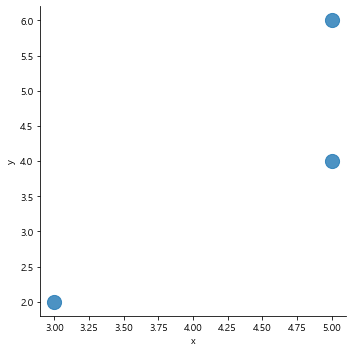

In [46]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200})

In [10]:
from numpy import linalg

dt_point = df.values
dt_point

# (0, 0)으로부터 어디가 제일 가까울까?
linalg.norm(dt_point, ord=2, axis=1)

array([8.54400375, 6.08276253, 3.60555128])

In [11]:
# L1 norm으로 계산
# 3명이 주사위를 3번 던진 후 걸음 수를 측정한다.

df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3,3)))
df.columns = ["move_1", "move_2", "move_3"]
print(df)

# 누가 가장 많이 걸었을까?
walk = df.values
linalg.norm(walk, ord=1, axis = 1)

   move_1  move_2  move_3
0       0       0      -3
1      -2      -2      -2
2      -3      -1       0


array([3., 6., 4.])

### KNN 구현

In [12]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) # n_neighbors : 이웃의 개수
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.predict(X_train) # 예측값

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [15]:
y_train # 정답 (예측값 1개 틀림, 훈련할수록 틀린 개수 줄어들면 과대적합 -> X_test로 테스트)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [16]:
clf.predict(X_test) # 예측값

array([1, 0, 1, 0, 1, 0, 0])

In [17]:
y_test # 정답 (예측값 1개 틀림, )

array([1, 0, 1, 0, 1, 1, 0])

In [18]:
clf.score(X_test, y_test) # 훈련 성능 정확도 85%

0.8571428571428571

### KNN 분석

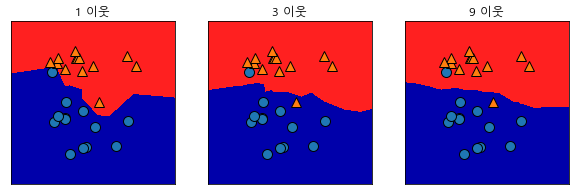

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neigh, ax in zip([1, 3, 9], axes):
    #print(n_neigh)
    #print(ax)
    clf = KNeighborsClassifier(n_neighbors = n_neigh)
    clf.fit(X, y)
    
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax) # 경계선 그리기
    
    ax.set_title("{} 이웃".format(n_neigh))
    
# 해석: 이웃의 개수가 너무 적으면 과대적합, 복잡도가 높음
# 적정한 이웃의 개수면 일반화, 복잡도가 낮음, 복잡도가 낮을수록 일반화잘됨
# 이웃의 개수가 너무 많으면 정확도/성능이 떨어짐
# 몇 개의 이웃이 적당할까?

In [41]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [38]:
#clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
clf.score(X_train, y_train) # 100프로 -> 이웃의 개수를 5개로 늘렸더니 94프로

0.9483568075117371

In [34]:
clf.score(X_test, y_test) # 91프로 -> 훈련 결과와 테스트 결과의 차이가 크다 => 과대적합 -> 이웃의 개수를 5개로 늘렸더니 93프로

0.9370629370629371

In [42]:
# 훈련 데이터와 테스트 데이터의 정확도 확인

train_acc = []
test_acc = []

for n_neigh in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

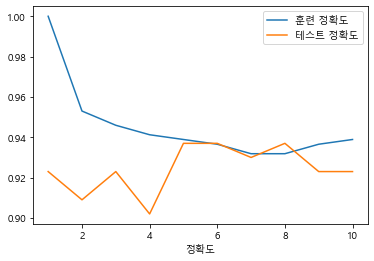

In [43]:
plt.plot(range(1, 11), train_acc, label="훈련 정확도")
plt.plot(range(1, 11), test_acc, label="테스트 정확도")
plt.xlabel("이웃의 개수")
plt.xlabel("정확도")
plt.legend()

In [44]:
test_acc[6]

0.9300699300699301

### 회귀분석을 위한 KNN

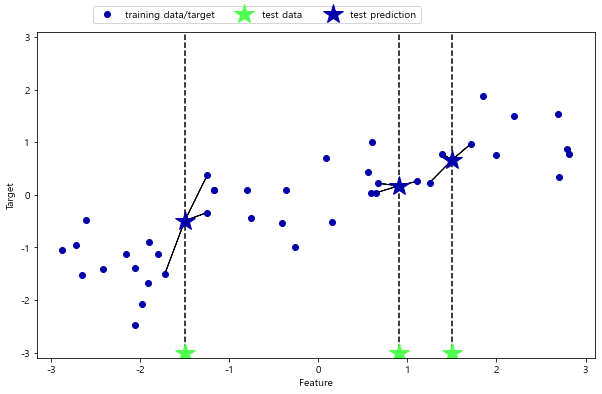

In [45]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [49]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25) # test_size=.25 기본값
print(X_train.shape, X_test.shape)

(30, 1) (10, 1)


In [50]:
?train_test_split

In [14]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3) # 이웃의 개수를 줄이거나 늘리면 설명 계수가 떨어진다..
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [63]:
print("설명 계수(R^2) : ", reg.score(X_test, y_test))

설명 계수(R^2) :  0.707138114401173


In [54]:
X_test

array([[-1.24713211],
       [ 0.67111737],
       [ 1.71105577],
       [-2.06388816],
       [-2.87649303],
       [-1.89957294],
       [ 0.55448741],
       [ 2.81945911],
       [-0.40832989],
       [-2.72129752]])

In [60]:
#reg.predict([[-1.24713211]]) # 틀림
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [61]:
#y_test[0] # 정답
y_test # 비슷한 데이터 있음..83프로의 정확도

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

### KNeighborsRegressor 분석

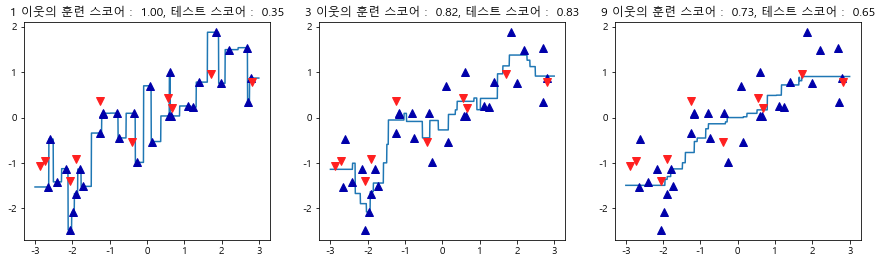

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neigh, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0} 이웃의 훈련 스코어 : {1: .2f}, 테스트 스코어 : {2: .2f}".format(n_neigh, reg.score(X_train, y_train),
                                                                                          reg.score(X_test, y_test)))
# 해석 : 이웃의 개수가 늘어날수록 선이 간단해진다

### iris를 이용한 사례

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.target_names) # 타겟명 : ['setosa' 'versicolor' 'virginica']
print(iris.feature_names) # 피처명 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris.target, random_state=0)

print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F5BCE9CA0>,
      dtype=object)

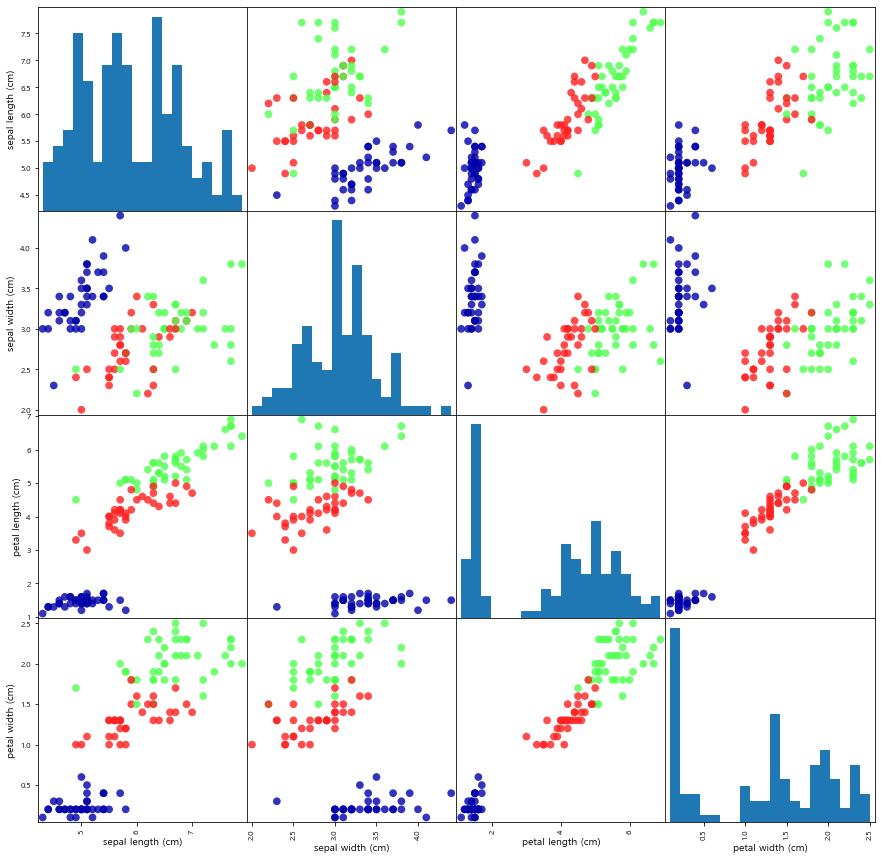

In [7]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

# seaborn의 pairplot과 동일한 함수
pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker="o", s=60, cmap=mglearn.cm3, c=y_train, alpha=.8,
                          hist_kwds={"bins":20})

# blue: setosa, red, green: versicolor, verginica

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print(knn.score(X_test, y_test))

# score함수에서 아래와 같이 계산한 것임
pred = knn.predict(X_test)
print(np.mean(pred == y_test))

0.9736842105263158
0.9736842105263158


In [15]:
reg.predict(X_test)

array([2.        , 1.        , 0.        , 2.        , 0.        ,
       2.        , 0.        , 1.        , 1.        , 1.        ,
       2.        , 1.        , 1.        , 1.        , 1.33333333,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       2.        , 1.        , 0.        , 0.        , 2.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       2.        , 1.        , 0.        , 1.66666667, 2.        ,
       1.        , 0.        , 2.        ])

In [16]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이 1cm, 폭은 0.2cm
s_height = 5.0
s_width = 2.9
p_height = 1.0
p_width = 0.2

X_new = np.array([[s_height, s_width, p_height, p_width]])
pred = knn.predict(X_new)

print("붓꽃의 품종은 ?", iris.target_names[pred])

붓꽃의 품종은 ? ['setosa']


### 영화 분류 프로그램 만들기

In [179]:
import operator

# 데이터 만드는 함수
def createDataset():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label

# 거리 계산하는 함수
def calcDistance(X_new, data):
    # 데이터의 개수 확인
    dataSize = len(data) # data.shape[0]
    
    # 새로 입력 데이터와 기존 데이터의 차이(diffMat = L2norm에서 절대값 x)
    diffMat = np.tile(X_new, (dataSize, 1)) - data 
    # np.tile([2.0, 3.0], (4, 1)) - data : 
    # 입력 데이터 [2.0, 3.0]을 4행 1열만큼 만들어서 기존 데이터와의 차이를 구함
    
    # L2 norm
    sqDiffMat = diffMat**2 # diffMat을 제곱해서
    sqDistance = sqDiffMat.sum(axis=1) # 다 더해서
    distance = sqDistance**0.5 # 루트 씌움
    #print(distance) # L2 norm으로 계산한 거리 1번째와 2번째 데이터에 가까움 => 입력 데이터는 액션 영화로 분류!
    
    return distance.argsort() # 거리순으로 인덱스 리턴

# 장르별 개수 카운팅하는 함수
def findMajorityClass(target, k, sortedDistance):
    classCount = {}

    for i in range(k):
        voteLabel = target[sortedDistance[i]] 
        # print(voteLabel) # Action, Action, Romance : 거리가 가까운 k개의 라벨(장르) 출력
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1 # voteLabel 값이 없으면 기본 0으로 처리, 같으면 계속 1씩 더함
    #print(classCount) # {'Action': 2, 'Romance': 1}
      
    # Dict는 정렬이 되지 않으므로 tuple / list로 바꾸어 정렬한다
    # print(sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)) # itemgetter(1) : dict의 2번째 요소(숫자)를 key로 하여 정렬함
    # itemgetter(0) : dict의 1번째 요소(알파벳)를 key로 하여 정렬함    
    
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
        
# 분류 함수
def classify(X_new, data, target, k):
    sortedDistance = calcDistance(X_new, data)
    #print(sortedDistance) # [0 1 3 2] 가장 가까운 데이터 1번째, 가장 먼 데이터 3번째
    sortedDistanceCount = findMajorityClass(target, k, sortedDistance) # target에 action, romance, sortedDistance가 가까운 k개 리턴
    
    return sortedDistanceCount

In [183]:
X, y = createDataset()
result = classify([2.0, 3.0], X, y, 3)
print("결과는 {} 영화다.".format(result[0][0]))

결과는 Action 영화다.


In [150]:
# np.tile()

np.tile([2.0, 3.0], (4, 1))

A = 1
B = np.array([0, 1])
C = np.array([[0, 1], [2, 3]])

np.tile(A, 3)
np.tile(B, 3)
np.tile(C, 3)

np.tile(A, (2, 3))
np.tile(B, (2, 3))
np.tile(C, (2, 3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])